# Multivariate Analysis & Visualizations

Load the [cleaned medical data](https://drive.google.com/file/d/15QvGnjlYvVd8bxl-Fl_EPVgmfvgATGZB/view?usp=sharing) using the url in the cell below:

In [2]:
## excel file url
url ="https://docs.google.com/spreadsheets/d/e/2PACX-1vRUYiMWJ3WI6lrrG8rdRFy49aaKSqtlZhbqHodoJfQeDnWj1bgvdSCVM0tnlTkExjhSv7f0LSfIiTVU/pub?output=xlsx"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_excel(url)
df.head()

,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,Base_charge,Additional_charges
0,AL,34.34960,-86.72508,Suburban,1.0,53.0,86575.93,Divorced,Male,0.0,19.141466,6.0,0.0,0.0,0.0,Emergency Admission,1.0,0.0,Medium,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,Blood Work,10.585770,3726.702860,17939.40342
1,FL,30.84513,-85.22907,Urban,3.0,51.0,46805.99,Married,Female,0.0,18.940352,4.0,2.0,1.0,0.0,Emergency Admission,1.0,0.0,High,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Intravenous,15.129562,4193.190458,17612.99812
2,SD,43.54321,-96.63772,Suburban,3.0,53.0,14370.14,Widowed,Female,0.0,18.057507,4.0,1.0,0.0,0.0,Elective Admission,1.0,0.0,Medium,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Blood Work,4.772177,2434.234222,17505.19246
3,MN,43.89744,-93.51479,Suburban,0.0,78.0,39741.49,Married,Male,0.0,16.576858,4.0,1.0,0.0,0.0,Elective Admission,0.0,1.0,Medium,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Blood Work,1.714879,2127.830423,12993.43735
4,OK,35.67302,-95.19180,Urban,3.0,76.0,81999.88,Never Married,Male,0.0,19.612646,6.0,0.0,0.0,0.0,Observation Admission,0.0,0.0,Medium,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,Blood Work,5.957250,2636.691180,12742.58991


1) This is a fun place to start!  Make a scatterplot with Lng on the x axis and Lat on the y axis.

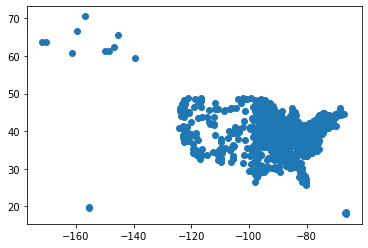

In [9]:
plt.scatter(data=df, x='Lng', y='Lat')

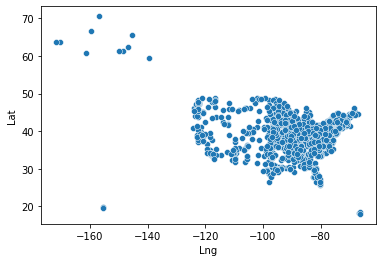

In [10]:
sns.scatterplot(data=df, x='Lng', y='Lat');

2a) Make a scatterplot that shows the Base_charge vs. Initial_days


Is there a relationship between Base_charge and Initial_days?

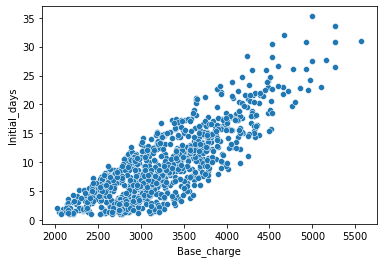

In [12]:
sns.scatterplot(data=df, x='Base_charge', y='Initial_days');

2a-Alternative) Make a [seaborn regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html) that shows the Base_charge vs. Initial_days. 
What advantage does the regplot have over the scatterplot, in terms of identifying relationships?

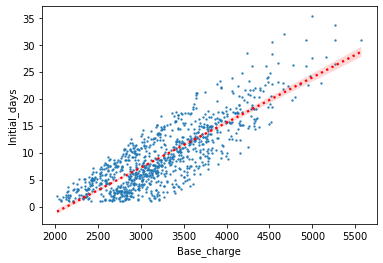

In [26]:
sns.regplot(data=df, x='Base_charge', y='Initial_days', 
            scatter_kws={'s':2}, 
            line_kws={'color': "r", 'ls':':'});


2b) Make a scatterplot that shows the Base_charge vs. Initial days that is color-coded based on the complication risk. 
What have you learned about complication risk, days and charge?

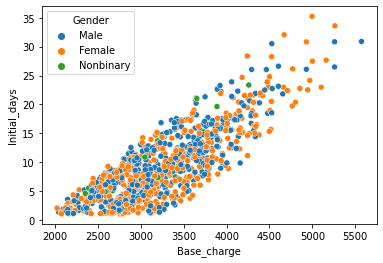

In [28]:
sns.scatterplot(data=df, x='Base_charge', y='Initial_days', hue = 'Gender');

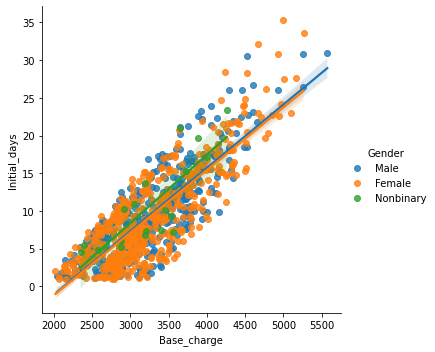

In [29]:
sns.lmplot(data=df, x='Base_charge', y='Initial_days', hue = 'Gender');

3) Make a barchart to show the average initial days for those with each level of complication risk. (hint: use groupby to groupby the Complication Risk and find the average of the initial days.) 

<BarContainer object of 3 artists>

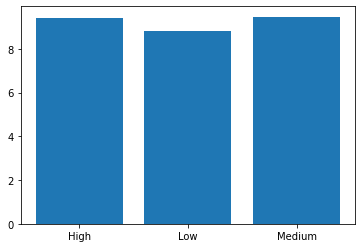

In [32]:
average = df.groupby('Complication_risk')['Initial_days'].mean()

plt.bar(average.index, average.values)

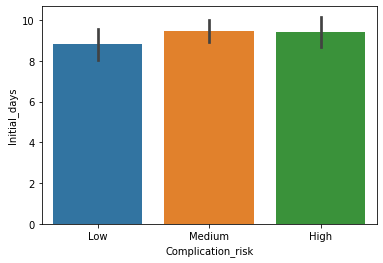

In [36]:
sns.barplot(data = df, x = 'Complication_risk', y='Initial_days', order = ['Low', 'Medium', 'High']);

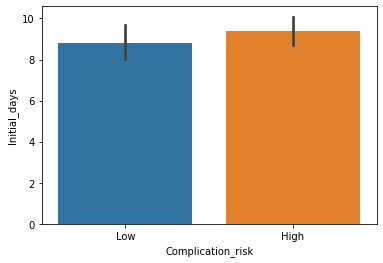

In [37]:
sns.barplot(data = df, x = 'Complication_risk', y='Initial_days', order = ['Low', 'High']);

4a) Create a filter to limit the dataset to only those who have high blood pressure (1 = yes, 0 = no).  

How many people have high blood pressure? (Hint: Find the length of your filter)


In [43]:
highbp = df[df['HighBlood'] == 1]
len(highbp)

402


4b) Now create a bar chart that shows the service received for only those who have high blood pressure.  

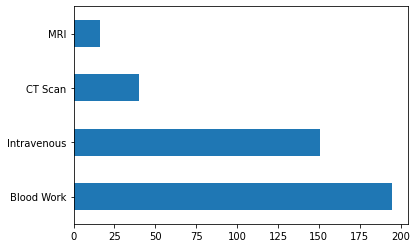

In [48]:
highbp['Services'].value_counts().plot(kind='barh');

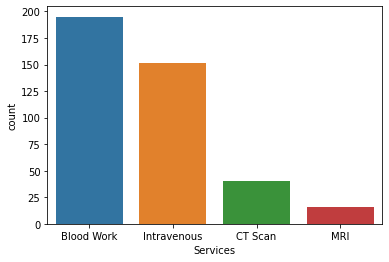

In [49]:
sns.countplot(data = highbp, x = 'Services')

5) Create a heatmap to show any potential correlations in this data

In [52]:
corr = df.corr()
corr.head()

,Lat,Lng,Children,Age,Income,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,HighBlood,Stroke,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Initial_days,Base_charge,Additional_charges
Lat,1.000000,-0.201343,0.018734,-0.021073,-0.030918,NaN,-0.028105,-0.016309,0.000671,-0.073800,0.051910,-0.009348,-0.050083,0.007994,0.007212,0.016694,0.040149,-0.005501,0.024071,0.059188,-0.022525,-0.015626,-0.005558,-0.014570,-0.015369
Lng,-0.201343,1.000000,-0.033917,0.024225,-0.069954,NaN,-0.026542,0.033234,-0.028768,0.025883,-0.010884,-0.035553,0.027513,-0.046639,0.009696,-0.002797,-0.021026,-0.009410,-0.019261,0.044165,-0.002365,-0.037253,-0.004808,0.005443,-0.006306
Children,0.018734,-0.033917,1.000000,0.076922,0.059469,NaN,-0.032177,-0.000204,0.003735,-0.042404,0.039349,-0.022406,-0.045496,-0.044590,0.005645,0.029424,0.043666,0.015364,0.022876,-0.020573,0.009552,-0.019176,-0.029288,-0.019473,0.052275
Age,-0.021073,0.024225,0.076922,1.000000,-0.013933,NaN,-0.011123,0.032233,0.010532,0.005556,0.002108,0.010161,0.005350,-0.019952,0.019557,0.034186,-0.051271,0.045562,-0.006315,-0.001540,-0.012437,0.037981,-0.025722,-0.039490,0.717254
Income,-0.030918,-0.069954,0.059469,-0.013933,1.000000,NaN,-0.038152,0.058202,-0.047993,0.009885,0.009713,-0.043077,0.012521,-0.049193,-0.010302,-0.044842,0.020566,0.016557,-0.006086,0.016264,0.041673,0.013831,0.079789,0.054007,-0.044419


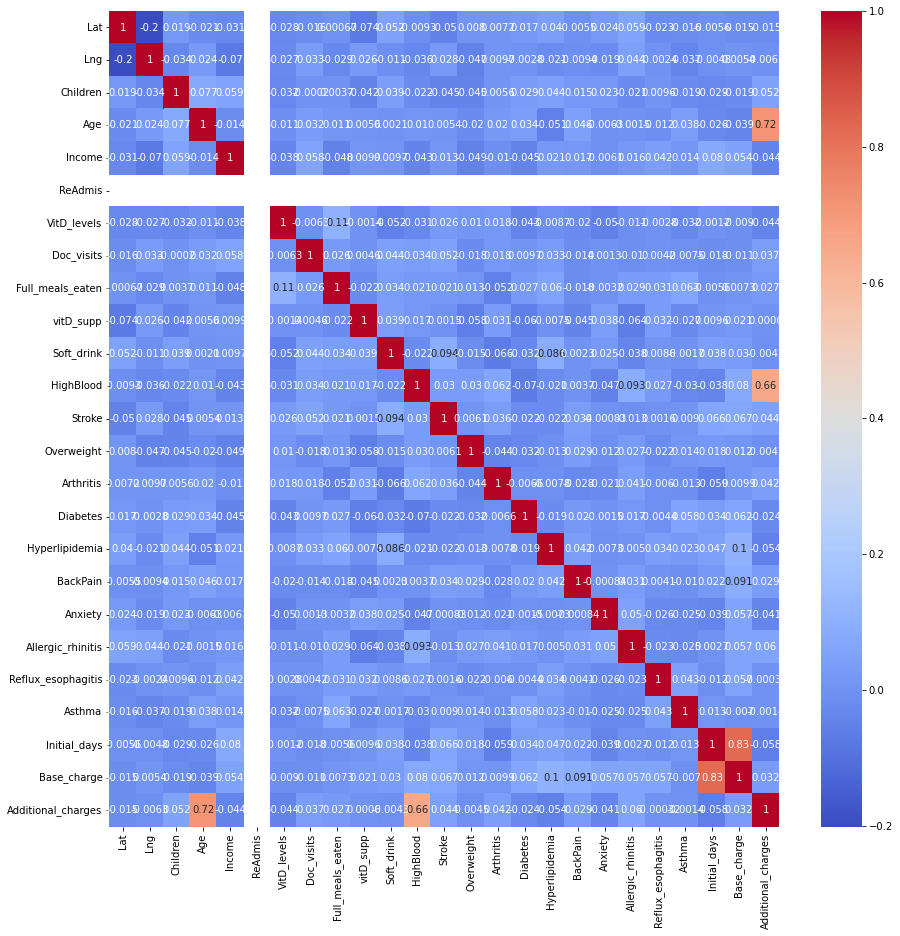

In [57]:
plt.figure(figsize = (15,15))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')

6) Make multivariate boxplot graph to compare the distribution of income by gender.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


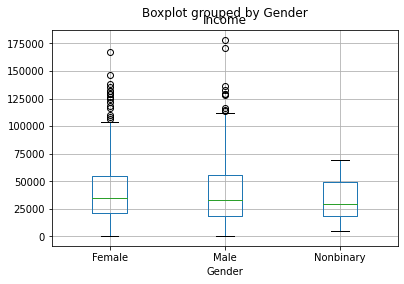

In [60]:
df.boxplot(by='Gender', column = 'Income');

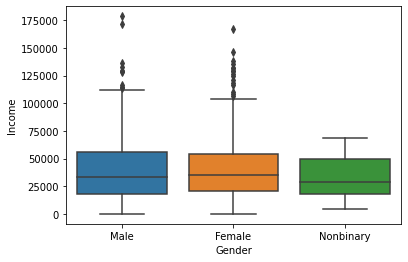

In [61]:
sns.boxplot(data=df, x='Gender', y='Income')

# New Section

If you have time, keep exploring!